# Prediction Analysis for Student Retention Rates

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
import scipy.stats as stats
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

from tools.utils import combine_columns, compute_feature_importance, standard_units

Given the preliminary feature analysis conducted in the `EDA.ipynb`, we have found that the following variables affect retention rates.

* Four-year retention rates
    - `SAT_AVG`
    - `AVGFASCAL`
    - `PAR_ED_PCT_HS` and `PAR_ED_PCT_PS`
    
* Less-than-four-year retention rates
    - `Ethnic Diversity (UGDS)`
    - `CCUGPROF`

Now, we are going to conduct further analysis including linear regression in order to explore the true relationship between these features and retention rates. 

## Loading in Data

In [2]:
# Load in cleaned data
data = pd.read_csv("data/Most-Recent-Cohorts-Institution-filtered.csv")
data = data.drop('Unnamed: 0', axis=1)

## Four-Year Retention Rates

## Racial and Ethnic Diversity Analysis

In [32]:
race_columns = ['UGDS_WHITE', 'UGDS_BLACK', 'UGDS_HISP', 'UGDS_ASIAN',
                'UGDS_AIAN', 'UGDS_NHPI', 'UGDS_2MOR', 'UGDS_NRA', 'UGDS_UNKN']
data[race_columns]

,UGDS_WHITE,UGDS_BLACK,UGDS_HISP,UGDS_ASIAN,UGDS_AIAN,UGDS_NHPI,UGDS_2MOR,UGDS_NRA,UGDS_UNKN
0,0.0159,0.9022,0.0116,0.0012,0.0028,0.0008,0.0143,0.0073,0.0440
1,0.5496,0.2401,0.0610,0.0704,0.0024,0.0004,0.0469,0.0232,0.0059
2,0.2550,0.6913,0.0268,0.0034,0.0000,0.0000,0.0000,0.0000,0.0235
3,0.7173,0.0907,0.0599,0.0354,0.0083,0.0010,0.0431,0.0190,0.0252
4,0.0167,0.9265,0.0130,0.0019,0.0017,0.0017,0.0119,0.0155,0.0111
...,...,...,...,...,...,...,...,...,...
6676,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6677,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6678,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6679,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


These columns provide information on the racial and ethnic diversity of undergraduate, degree-seeking students in a particular institutions. 

* white (UGDS_WHITE)

* black (UGDS_BLACK)

* Hispanic (UGDS_HISP)

* Asian (UGDS_ASIAN)

* American Indian/Alaska Native (UGDS_AIAN)

* Native Hawaiian/Pacific Islander (UGDS_NHPI)

* two or more races (UGDS_2MOR)

* non-resident aliens (UGDS_NRA)

* unknown (UGDS_UNKN)

We will be using the **Simpson's Diversity Index** to describe the Racial and Ethnic diversity of professions schools in the United States. 

$$1 - \sum_{i=1}^{n} p_i^2$$ 

In [33]:
data['diversity_index'] = 1 - data[race_columns].apply(lambda row: row**2, axis=1).sum(axis=1)
data['diversity_index']

0       0.183444
1       0.628836
2       0.455797
3       0.469490
4       0.140635
          ...   
6676    1.000000
6677    1.000000
6678    1.000000
6679    1.000000
6680    1.000000
Name: diversity_index, Length: 6681, dtype: float64

In [34]:
FT4_institutions = data[data['RET_FT4'].notnull()][['RET_FT4', 'diversity_index']]
FTL4_institutions = data[data['RET_FTL4'].notnull()][['RET_FTL4', 'diversity_index']]

In [35]:
FT4_institutions.head()

,RET_FT4,diversity_index
0,0.5403,0.183444
1,0.8640,0.628836
2,0.5000,0.455797
3,0.8180,0.469490
4,0.6202,0.140635


In [36]:
FTL4_institutions.head()

,RET_FTL4,diversity_index
6,0.5915,0.430426
11,0.5538,0.661073
13,0.5961,0.588972
14,0.5449,0.527717
16,0.5357,0.478832


### Comparing the Diversity and Retention Rates between four-year and less-than-four-year institution

In [1]:
# four-year institutions
print(FT4_institutions['RET_FT4'].mean(), FT4_institutions['diversity_index'].mean())

NameError: name 'FT4_institutions' is not defined

In [38]:
# less-than-four-year institutions
print(FTL4_institutions['RET_FTL4'].mean(), FTL4_institutions['diversity_index'].mean())

0.6909051969012266 0.47995730161071665


#### Four-year institutions

When you have two massive continuous data and you want to visualize their relationship, you can use a scatter plot. Scatter plots are useful for visualizing the relationship between two continuous variables. Each data point is plotted as a point on the graph, with one variable on the x-axis and the other on the y-axis.

However, if you have a large number of data points, a scatter plot can become overcrowded and difficult to interpret. In such cases, you can use a 2D density plot. These plots provide a way to visualize the distribution of the data while reducing the clutter caused by overlapping points in a scatter plot. A 2D density plot creates a smoothed representation of the data by estimating the density of points in different regions of the plot.

* $H_0:$ There is no relationship between the retension rate and diversity index at four-year institutions. 

* $H_1:$ There is no relationship between the retension rate and diversity index at four-year institutions. 

In [39]:
corr, p_value = stats.pearsonr(FT4_institutions['diversity_index'], FT4_institutions['RET_FT4'])
print(corr, p_value)

-0.012020871881703171 0.583742479083747


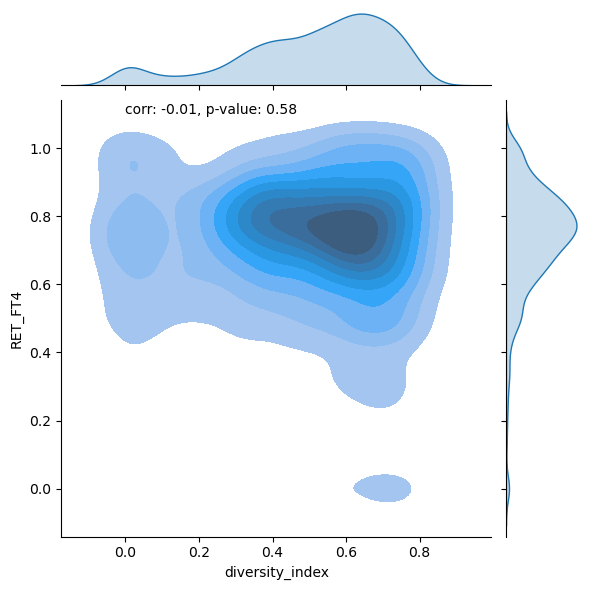

In [40]:
f = sns.jointplot(data=FT4_institutions, x='diversity_index', y='RET_FT4', kind='kde', fill='b')
f.ax_joint.annotate(f'corr: {corr:.2f}, p-value: {p_value:.2f}', xy=(0,1.1))
plt.savefig('figures/RET_FT4_diversity.png');

**The p-value is around 0.58, which is very large. This means that we can conclude that there is no relationship between retention rate and diversity index at four-year institutions.**

#### Less than four-year institutions

* $H_0:$ There is no relationship between the retension rate and diversity index at less-than-four-year institutions. 

* $H_1:$ There is no relationship between the retension rate and diversity index at less-than-four-year institutions. 

In [41]:
corr, p_value = stats.pearsonr(FTL4_institutions['diversity_index'], FTL4_institutions['RET_FTL4'])
print(corr, p_value)

-0.08259689032835084 4.15791895176101e-06


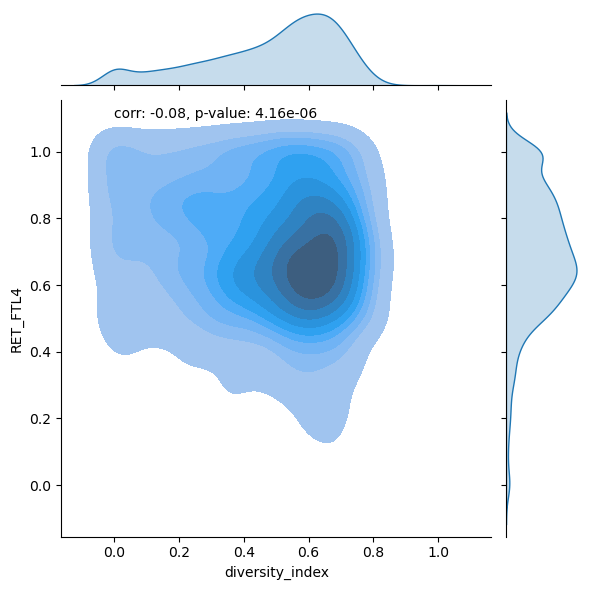

In [42]:
g = sns.jointplot(data=FTL4_institutions, x='diversity_index', y='RET_FTL4', kind='kde', fill='b')
g.ax_joint.annotate(f'corr: {corr:.2f}, p-value: {p_value:.2e}', xy=(0,1.1))
plt.savefig('figures/RET_FTL4_diversity.png');

**The p-value is very small. This means that we can conclude that there is a relationship between retention rate and diversity index at less-than-four-year institutions. The correlation between diversity index and retention rate is negative. Therefore, we can conclude that as diversity index increases, the retention rate for less-than-four-year institution decreases.**

### SAT Scores vs. Retention Rate in four year institution

In [63]:
FT4_institutions = data[data['RET_FT4'].notnull()][['RET_FT4', 'SAT_AVG']]
FTL4_institutions = data[data['RET_FTL4'].notnull()][['RET_FTL4', 'SAT_AVG']]

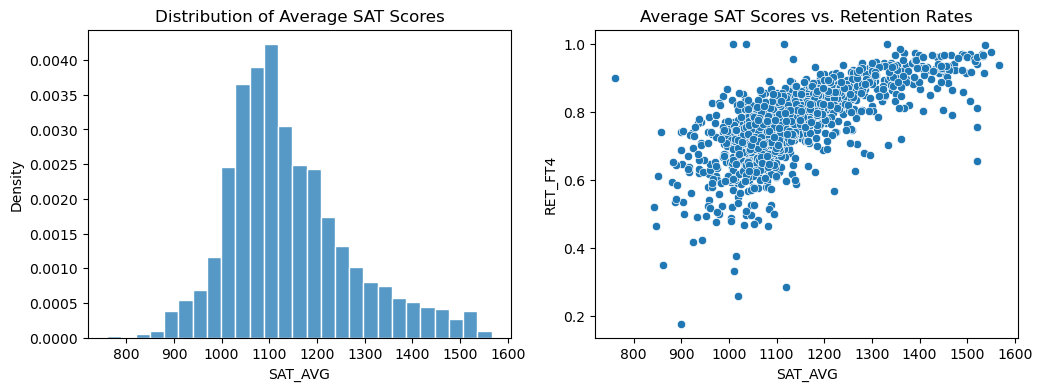

In [64]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(12,4))
sns.histplot(data=FT4_institutions, x='SAT_AVG', edgecolor='white', stat='density', ax=ax1)
ax1.set_title('Distribution of Average SAT Scores')
sns.scatterplot(data=FT4_institutions, x='SAT_AVG', y='RET_FT4', ax=ax2)
ax2.set_title('Average SAT Scores vs. Retention Rates')
plt.savefig('figures/SAT_AVG_VS_RET_FT4.png');

The average SAT score for four year institutions is around 1100. There is a positive relationship between average SAT score and retention rate. In other words, as the average SAT scores increase, the retention rate also increases.

### SAT Scores vs. Retention Rate in less than four year institution

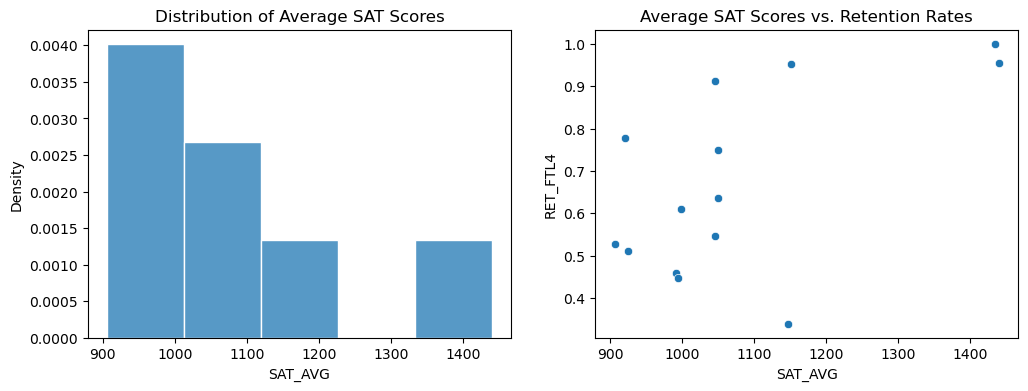

In [65]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(12,4))
sns.histplot(data=FTL4_institutions, x='SAT_AVG', edgecolor='white', stat='density', ax=ax1)
ax1.set_title('Distribution of Average SAT Scores')
sns.scatterplot(data=FTL4_institutions, x='SAT_AVG', y='RET_FTL4', ax=ax2)
ax2.set_title('Average SAT Scores vs. Retention Rates')
plt.savefig('figures/SAT_AVG_VS_RET_FTL4.png');

Less than four year institutions do not require the SAT score, therefore there is not too much SAT scores data collected. However, there appears to be a positive relationship between average SAT score and retention rate. As the average SAT scores increase, the retention rate also increases. 

## Linear Regression

In [ ]:
def filtered_df_two_columns(df, col1, col2):
    """
    Input: the dataframe and 2 variable column names
    Output: returns a new DataFrame that only contains values in both columns (no NA)
    """
    # Check that the input DataFrame contains both column names
    if col1 not in df.columns or col2 not in df.columns:
        raise ValueError("Input DataFrame does not contain both specified column names")

    # Select only the specified columns
    selected_cols = [col1, col2]
    new_df = df[selected_cols]

    # Use pandas' built-in methods to check which cells have numbers
    is_numeric = pd.to_numeric(new_df.iloc[:, 0], errors="coerce").notnull() & pd.to_numeric(new_df.iloc[:, 1], errors="coerce").notnull()

    # Filter the DataFrame to keep only the rows with numbers in both columns
    filtered_df = new_df.loc[is_numeric]

    return filtered_df

In [ ]:
# Pearson correlation coefficient 
def pearson_corr_coef(x, y):
    """
    Input: two lists of equal length
    Output: returns an array with the Pearson correlation coefficient
    """
    # Checking if the values in the list are the same
    if len(x) !=  len(y):
        raise ValueError("Input lists must have the same length")

    # Find Covariance
    covariance = np.cov(x, y)

    # Standard deviation of x and y
    stdx = np.std(x)
    stdy = np.std(y)

    # Returning Correlation coefficient
    return covariance / (stdx * stdy)

In [ ]:
def prediction_analysis(filtered_data):
    """
    Input: Filtered Dataframe that only has two columns
    Performs a simple linear regression analysis on the input data and generates 
    predictions based on the input variables.
    """
    # Check that the input DataFrame contains only two columns
    if len(filtered_data.columns) < 2:
        raise ValueError("Input DataFrame contains less than 2 columns (Must only include 2)")
    if len(filtered_data.columns) > 2:
        raise ValueError("Input DataFrame contains more than 2 columns (Must only include 2)")

    # Fit a simple linear regression model to the input data
    model = LinearRegression()
    X = filtered_data.iloc[:, 0].values.reshape(-1, 1)
    y = filtered_data.iloc[:, 1].values.reshape(-1, 1)
    model.fit(X, y)

    # Generate predictions for the output column based on the input variables
    pred_col = model.predict(X)

    return pred_col

In [ ]:
def regression_analysis_results(x_col, y_col, pred_col):
    """
    Input: Columns containing the x values, actual values, and predicted values
    Performs a regression analysis to determine how well the model predicts the actual values.
    Calculates and returns the R-squared value and generates a scatter plot of the predicted values 
    versus the actual values.
    """
    # Check that the input DataFrame contains both columns
    if len(y_col) != len(pred_col):
        raise ValueError("Input columns are not the same length")

    # Calculate the R-squared value
    r_squared = r2_score(y_col, pred_col)

    # Generate a scatter plot of the predicted values versus the actual values
    plt.scatter(y_col, pred_col)
    plt.plot(x_col, pred_col, color = 'red', linewidth = 2)
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
    plt.title('Regression Analysis Results')
    plt.show()

    return r_squared